In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import config
import csv

from fastai import *
from fastai.text import *

In [2]:
bs=48

In [3]:
torch.cuda.set_device(0)

In [4]:
# load databunch
data_lm = load_data('.', 'lm_databunch', bs=bs)

In [5]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [6]:
wiki103 = pickle.load(open('wt103-fwd/itos_wt103.pkl', 'rb'))

In [7]:
vocab = data_lm.vocab

In [8]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


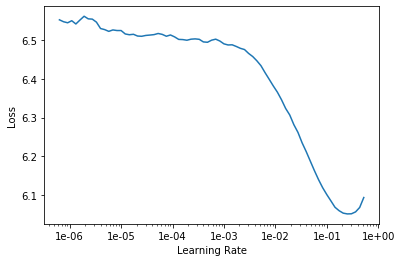

In [9]:
learn_lm.recorder.plot(skip_end=15)

In [10]:
lr = 3e-2
lr *= bs/48

In [11]:
learn_lm.to_fp16()

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (7006031 items)
x: LMTextList
xxbos xxmaj and to top it all off the couple had ordered an xxmaj oreo xxmaj shake,xxbos xxmaj you had one job .,xxbos xxmaj cummings probably canceled the meeting because he was busy dodging bullets in the inner city where he lives .,xxbos correlation ! = causation,xxbos i am sure they will be back up soon enough
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (1751508 items)
x: LMTextList
xxbos xxmaj so it 's possible to watch a prank video on the internet without going into a fuming rage ?,xxbos xxmaj all i could think was : " xxmaj god i hope rifftrax does this film ! ",xxbos looks like the only answer is to bomb the xxmaj russians .,xxbos xxmaj it 's illegal and if xxmaj trump succeeds in cutting off states like xxmaj california and xxmaj washington , then we states have every right to stop paying xxmaj federal xxmaj income and other xxmaj federal taxes .,xxbos xxmaj called it .
y: LMLabelList
,,,

In [12]:
learn_lm.fit_one_cycle(1, lr*10, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.108281,4.962931,0.238882,4:15:07


In [13]:
learn_lm.unfreeze()

In [14]:
learn_lm.fit_one_cycle(10, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.234901,4.197365,0.311140,4:48:56
1,4.343832,4.284374,0.302180,4:43:17
2,nan,nan,0.009290,4:04:58
3,nan,nan,0.009290,3:31:45


KeyboardInterrupt: 

In [ ]:
learn_lm.save('fine_tuned')
learn_lm.save_encoder('fine_tuned_enc')